In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/tkh5044/portfolio/master/capstone-predicting-game-attendance/data/all-teams-1990-2016.csv')
df.head()

,date,team_x,opponent,div_rank,gb,time,attendance,streak,double_header,runs_pg,...,year,month,day,weekday,weekday_name,stadium,capacity,bat_age,pitch_age,division_game
0,1997-04-02,ANA,BOS,0,0.0,0 days 03:47:00.000000000,30874,0,0,0.000000,...,1997,4,2,2,Wednesday,Angel Stadium,33851,29.7,28.3,0
1,1997-04-03,ANA,BOS,3,-1.0,0 days 02:07:00.000000000,17323,-1,0,5.000000,...,1997,4,3,3,Thursday,Angel Stadium,33851,29.7,28.3,0
2,1997-08-22,ANA,BOS,2,-2.5,0 days 03:25:00.000000000,24977,-3,0,5.273438,...,1997,8,22,4,Friday,Angel Stadium,33851,29.7,28.3,0
3,1997-08-23,ANA,BOS,2,-2.5,0 days 02:49:00.000000000,20994,1,0,5.294574,...,1997,8,23,5,Saturday,Angel Stadium,33851,29.7,28.3,0
4,1997-08-24,ANA,BOS,2,-1.5,0 days 02:36:00.000000000,20733,2,0,5.300000,...,1997,8,24,6,Sunday,Angel Stadium,33851,29.7,28.3,0


In [3]:
# drop years before 2010 -> one year of data
df['date'] = pd.to_datetime(df['date'])
df = df[df.date > '1990-01-01']
df.head()

,date,team_x,opponent,div_rank,gb,time,attendance,streak,double_header,runs_pg,...,year,month,day,weekday,weekday_name,stadium,capacity,bat_age,pitch_age,division_game
0,1997-04-02,ANA,BOS,0,0.0,0 days 03:47:00.000000000,30874,0,0,0.000000,...,1997,4,2,2,Wednesday,Angel Stadium,33851,29.7,28.3,0
1,1997-04-03,ANA,BOS,3,-1.0,0 days 02:07:00.000000000,17323,-1,0,5.000000,...,1997,4,3,3,Thursday,Angel Stadium,33851,29.7,28.3,0
2,1997-08-22,ANA,BOS,2,-2.5,0 days 03:25:00.000000000,24977,-3,0,5.273438,...,1997,8,22,4,Friday,Angel Stadium,33851,29.7,28.3,0
3,1997-08-23,ANA,BOS,2,-2.5,0 days 02:49:00.000000000,20994,1,0,5.294574,...,1997,8,23,5,Saturday,Angel Stadium,33851,29.7,28.3,0
4,1997-08-24,ANA,BOS,2,-1.5,0 days 02:36:00.000000000,20733,2,0,5.300000,...,1997,8,24,6,Sunday,Angel Stadium,33851,29.7,28.3,0


In [ ]:
# use only Oakland A's data
df_OAK = df[df.team_x == "OAK"]
df_OAK = df_OAK.sort_values(by=['date'])
df_OAK.head()

,date,team_x,opponent,div_rank,gb,time,attendance,streak,double_header,runs_pg,...,year,month,day,weekday,weekday_name,stadium,capacity,bat_age,pitch_age,division_game
46324,1990-04-09,OAK,MIN,0,0.0,0 days 02:50:00.000000000,48219,0,0,0.000000,...,1990,4,9,0,Monday,O.co Coliseum,48219,29.2,31.7,1
46325,1990-04-10,OAK,MIN,1,0.0,0 days 02:37:00.000000000,19757,1,0,8.000000,...,1990,4,10,1,Tuesday,O.co Coliseum,48219,29.2,31.7,1
46326,1990-04-11,OAK,MIN,1,0.0,0 days 02:26:00.000000000,27775,2,0,6.500000,...,1990,4,11,2,Wednesday,O.co Coliseum,48219,29.2,31.7,1
46094,1990-04-19,OAK,SEA,1,1.5,0 days 02:43:00.000000000,23979,5,0,5.750000,...,1990,4,19,3,Thursday,O.co Coliseum,48219,29.2,31.7,1
46095,1990-04-20,OAK,SEA,1,2.0,0 days 02:19:00.000000000,44911,6,0,5.666667,...,1990,4,20,4,Friday,O.co Coliseum,48219,29.2,31.7,1


In [ ]:
df_OAK.shape

(2142, 27)

(array([106., 437., 405., 408., 297., 222., 122., 107.,  21.,  17.]),
 array([ 4651. ,  9784.8, 14918.6, 20052.4, 25186.2, 30320. , 35453.8,
        40587.6, 45721.4, 50855.2, 55989. ]),
 <a list of 10 Patch objects>)

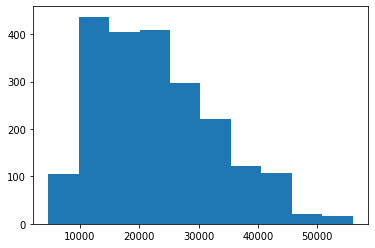

In [ ]:
plt.hist([df_OAK["attendance"]])

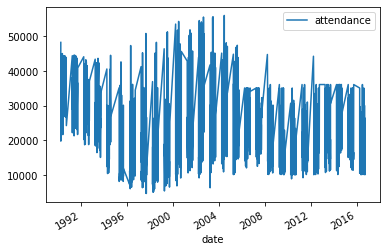

In [ ]:
pd.DataFrame(df_OAK,columns=['date','attendance']).plot(x ='date', y='attendance', kind = 'line')

In [ ]:
df_OAK.describe()


,div_rank,gb,attendance,streak,double_header,runs_pg,runs_ma,runs_allowed_ma,ten_game,opening_day,...,win_pct,night_game,year,month,day,weekday,capacity,bat_age,pitch_age,division_game
count,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,...,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000
mean,2.676471,-5.707983,22819.008403,0.333333,0.006069,4.602633,4.607197,4.434827,0.462606,0.012605,...,0.501950,0.552288,2003.162465,6.581232,15.337068,3.164799,40541.438375,28.662465,28.503548,0.361345
std,1.394055,6.950956,10135.117397,2.667990,0.077686,0.867458,1.636850,1.575383,0.193310,0.111588,...,0.118214,0.497375,7.769191,1.715300,8.931015,1.991672,5144.371519,0.779274,1.841163,0.480502
min,0.000000,-26.000000,4651.000000,-12.000000,0.000000,0.000000,0.000000,0.800000,0.000000,0.000000,...,0.000000,0.000000,1990.000000,3.000000,1.000000,0.000000,34077.000000,27.200000,25.700000,0.000000
25%,2.000000,-10.000000,14763.250000,-1.000000,0.000000,4.285714,3.600000,3.200000,0.300000,0.000000,...,0.444444,0.000000,1997.000000,5.000000,7.000000,1.000000,35067.000000,28.100000,27.100000,0.000000
50%,2.000000,-4.500000,21096.500000,1.000000,0.000000,4.627451,4.400000,4.200000,0.500000,0.000000,...,0.504587,1.000000,2003.000000,7.000000,16.000000,3.000000,43662.000000,28.700000,27.900000,0.000000
75%,4.000000,-0.500000,29665.750000,2.000000,0.000000,4.976469,5.600000,5.400000,0.600000,0.000000,...,0.567797,1.000000,2010.000000,8.000000,23.000000,5.000000,43662.000000,29.200000,30.900000,1.000000
max,7.000000,11.000000,55989.000000,19.000000,1.000000,10.500000,12.400000,11.200000,1.000000,1.000000,...,1.000000,1.000000,2016.000000,10.000000,31.000000,6.000000,48219.000000,30.200000,32.000000,1.000000


In [ ]:
df_OAK.columns

Index(['date', 'team_x', 'opponent', 'div_rank', 'gb', 'time', 'attendance',
       'streak', 'double_header', 'runs_pg', 'runs_ma', 'runs_allowed_ma',
       'ten_game', 'opening_day', 'total_games', 'win_pct', 'night_game',
       'year', 'month', 'day', 'weekday', 'weekday_name', 'stadium',
       'capacity', 'bat_age', 'pitch_age', 'division_game'],
      dtype='object')

In [ ]:
#bat_age -> average age of batter, pitch_age -> average age of pitcher, dont really help that much

In [ ]:
df_OAK.dtypes

date               datetime64[ns]
team_x                     object
opponent                   object
div_rank                    int64
gb                        float64
time                       object
attendance                  int64
streak                      int64
double_header               int64
runs_pg                   float64
runs_ma                   float64
runs_allowed_ma           float64
ten_game                  float64
opening_day                 int64
total_games                 int64
win_pct                   float64
night_game                  int64
year                        int64
month                       int64
day                         int64
weekday                     int64
weekday_name               object
stadium                    object
capacity                    int64
bat_age                   float64
pitch_age                 float64
division_game               int64
dtype: object

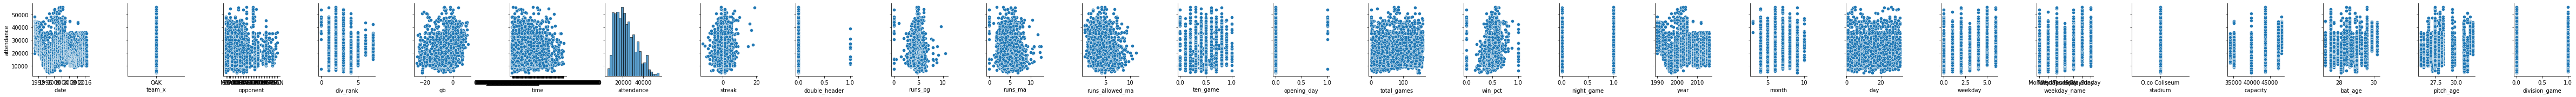

In [ ]:
sns.pairplot(
    df_OAK,
    x_vars=list(df_OAK.columns.values),
    y_vars=["attendance"],
)

In [ ]:
columns = list(df_OAK.columns.values)
columns.remove('time')
columns.remove('team_x')

In [ ]:
df_OAK = pd.get_dummies(df_OAK[columns],drop_first=True)
#df_OAK = df_OAK[columns]
df_OAK_train = df_OAK[df_OAK.date < '2016-01-01']
df_OAK_test = df_OAK[df_OAK.date > '2016-01-01']


In [ ]:
df_OAK_train.dtypes

date                      datetime64[ns]
div_rank                           int64
gb                               float64
attendance                         int64
streak                             int64
double_header                      int64
runs_pg                          float64
runs_ma                          float64
runs_allowed_ma                  float64
ten_game                         float64
opening_day                        int64
total_games                        int64
win_pct                          float64
night_game                         int64
year                               int64
month                              int64
day                                int64
weekday                            int64
capacity                           int64
bat_age                          float64
pitch_age                        float64
division_game                      int64
opponent_ARI                       uint8
opponent_ATL                       uint8
opponent_BAL    

In [ ]:
columns = list(df_OAK.columns.values)

columns.remove('attendance')
columns.remove('pitch_age')
columns.remove('bat_age')
columns.remove('capacity')
columns.remove('date')

In [ ]:
columns

['div_rank',
 'gb',
 'streak',
 'double_header',
 'runs_pg',
 'runs_ma',
 'runs_allowed_ma',
 'ten_game',
 'opening_day',
 'total_games',
 'win_pct',
 'night_game',
 'year',
 'month',
 'day',
 'weekday',
 'division_game',
 'opponent_ARI',
 'opponent_ATL',
 'opponent_BAL',
 'opponent_BOS',
 'opponent_CAL',
 'opponent_CHC',
 'opponent_CHW',
 'opponent_CIN',
 'opponent_CLE',
 'opponent_COL',
 'opponent_DET',
 'opponent_FLA',
 'opponent_HOU',
 'opponent_KCR',
 'opponent_LAA',
 'opponent_LAD',
 'opponent_MIL',
 'opponent_MIN',
 'opponent_MON',
 'opponent_NYM',
 'opponent_NYY',
 'opponent_PHI',
 'opponent_PIT',
 'opponent_SDP',
 'opponent_SEA',
 'opponent_SFG',
 'opponent_STL',
 'opponent_TBD',
 'opponent_TBR',
 'opponent_TEX',
 'opponent_TOR',
 'opponent_WSN',
 'weekday_name_Monday',
 'weekday_name_Saturday',
 'weekday_name_Sunday',
 'weekday_name_Thursday',
 'weekday_name_Tuesday',
 'weekday_name_Wednesday']

In [ ]:
X_train = df_OAK_train[columns]
X_test = df_OAK_test[columns]
y_train = df_OAK_train['attendance']
y_test = df_OAK_test['attendance']

In [ ]:
X_train.describe()

,div_rank,gb,streak,double_header,runs_pg,runs_ma,runs_allowed_ma,ten_game,opening_day,total_games,...,opponent_TBR,opponent_TEX,opponent_TOR,opponent_WSN,weekday_name_Monday,weekday_name_Saturday,weekday_name_Sunday,weekday_name_Thursday,weekday_name_Tuesday,weekday_name_Wednesday
count,2061.000000,2061.000000,2061.000000,2061.000000,2061.000000,2061.000000,2061.000000,2061.000000,2061.000000,2061.000000,...,2061.000000,2061.000000,2061.000000,2061.000000,2061.000000,2061.000000,2061.000000,2061.000000,2061.000000,2061.000000
mean,2.621543,-5.438865,0.362931,0.006308,4.633755,4.632371,4.429209,0.466499,0.012615,79.600679,...,0.015526,0.103348,0.060650,0.001456,0.110626,0.160116,0.159146,0.105289,0.149927,0.156720
std,1.380306,6.782180,2.681158,0.079189,0.862387,1.630211,1.580027,0.193765,0.111634,46.416134,...,0.123664,0.304487,0.238745,0.038134,0.313744,0.366803,0.365901,0.307000,0.357087,0.363625
min,0.000000,-26.000000,-12.000000,0.000000,0.000000,0.000000,0.800000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,-9.500000,-1.000000,0.000000,4.365591,3.600000,3.200000,0.300000,0.000000,40.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,-4.500000,1.000000,0.000000,4.646341,4.600000,4.200000,0.500000,0.000000,81.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,-0.500000,2.000000,0.000000,5.000000,5.600000,5.400000,0.600000,0.000000,118.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7.000000,11.000000,19.000000,1.000000,10.500000,12.400000,11.200000,1.000000,1.000000,161.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X_train.dtypes

div_rank                    int64
gb                        float64
streak                      int64
double_header               int64
runs_pg                   float64
runs_ma                   float64
runs_allowed_ma           float64
ten_game                  float64
opening_day                 int64
total_games                 int64
win_pct                   float64
night_game                  int64
year                        int64
month                       int64
day                         int64
weekday                     int64
division_game               int64
opponent_ARI                uint8
opponent_ATL                uint8
opponent_BAL                uint8
opponent_BOS                uint8
opponent_CAL                uint8
opponent_CHC                uint8
opponent_CHW                uint8
opponent_CIN                uint8
opponent_CLE                uint8
opponent_COL                uint8
opponent_DET                uint8
opponent_FLA                uint8
opponent_HOU  

In [ ]:
X_train.dtypes

div_rank                    int64
gb                        float64
streak                      int64
double_header               int64
runs_pg                   float64
runs_ma                   float64
runs_allowed_ma           float64
ten_game                  float64
opening_day                 int64
total_games                 int64
win_pct                   float64
night_game                  int64
year                        int64
month                       int64
day                         int64
weekday                     int64
division_game               int64
opponent_ARI                uint8
opponent_ATL                uint8
opponent_BAL                uint8
opponent_BOS                uint8
opponent_CAL                uint8
opponent_CHC                uint8
opponent_CHW                uint8
opponent_CIN                uint8
opponent_CLE                uint8
opponent_COL                uint8
opponent_DET                uint8
opponent_FLA                uint8
opponent_HOU  

In [ ]:
X_train.columns.difference(X_test.columns).tolist()

[]

In [ ]:
X_train.shape

(2061, 55)

In [ ]:
X_test.shape

(81, 55)

In [ ]:
y_train.shape

(2061,)

In [ ]:
y_test.shape

(81,)

## Train Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRFRegressor
from sklearn.metrics import mean_absolute_error

In [ ]:
def trainModel(model):
  model.fit(X_train, y_train)
  score=model.score(X_test, y_test)
  mae=mean_absolute_error(y_test,model.predict(X_test))

  return score,mae,

In [ ]:
trainModel(LinearRegression())

(0.4892493261117793, 4007.7112792304797)

In [ ]:
trainModel(DecisionTreeRegressor())

(-0.008592260561062881, 5475.666666666667)

In [ ]:
trainModel(XGBRegressor())

[03:32:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(0.5932812338733396, 3666.9506896219136)

In [ ]:
trainModel(RandomForestRegressor())

(0.6391880984958477, 3259.0824691358025)

In [ ]:
trainModel(XGBRFRegressor())

[03:32:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(0.3165685046977649, 4917.437258873457)

In [ ]:
def plotModel(model):
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  plt.plot(df_OAK['date'][-81:], predictions, "--") #predicted
  plt.plot(df_OAK['date'][-81:], y_test) #actual
  return np.abs(predictions-y_test).median()

3525.004777176422

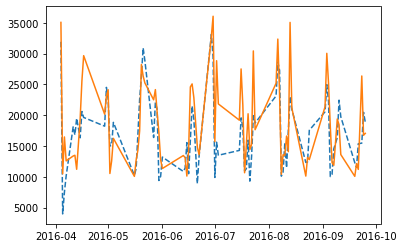

In [ ]:
plotModel(LinearRegression())

4533.0

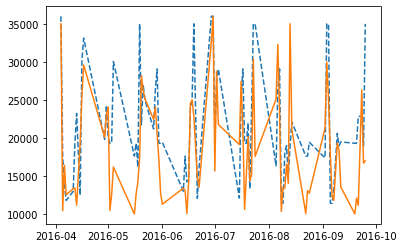

In [ ]:
plotModel(DecisionTreeRegressor())

2570.4500000000007

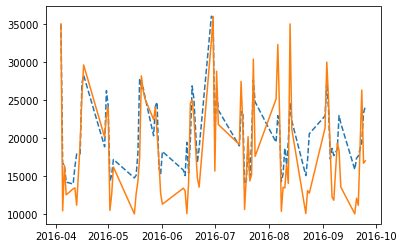

In [ ]:
best_model = RandomForestRegressor(random_state=0)
best_model.fit(X_train, y_train)
plotModel(best_model)

In [ ]:
from time import time
time1 = time()
newModel = RandomForestRegressor(random_state=0)
newModel.fit(X_train, y_train)
newModel.score(X_test, y_test)
time2 = time()
time2 - time1


2.0210957527160645

## Hyper parameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# ensemble:
# - boosting: XGBost, GradientBoost, AdaBoost
# - bagging: Random Forest

### Hyper parameter tuning 1st iteration

In [ ]:
params={'max_depth': [32, 64, 100, 200, None],
 'max_features': ['auto', 'log2', None],
 'min_samples_leaf': [2, 4, 6],
 'min_samples_split': [2, 4, 6],
 'n_estimators': [32, 64, 100, 200]}

model = RandomForestRegressor(random_state=1)
grid_search=RandomizedSearchCV(model,params,cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1),
                   param_distributions={'max_depth': [32, 64, 100, 200, None],
                                        'max_features': ['auto', 'log2', None],
                                        'min_samples_leaf': [2, 4, 6],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [32, 64, 100, 200]},
                   scoring='neg_mean_absolute_error')

In [ ]:
## Overfitting

In [ ]:
grid_search.best_params_

{'max_depth': 100,
 'max_features': None,
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 100}

In [ ]:
best_model1=grid_search.best_estimator_
predictions1 = best_model1.predict(X_test)
trainModel(best_model1)

(0.6162094151018309, 3354.2759687699136)

2247.0945230880207

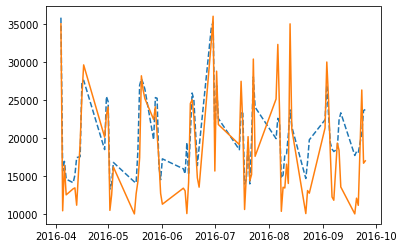

In [ ]:
plotModel(best_model1)

### Hyper parameter tuning 2nd iteration

In [ ]:
params={'max_depth': [70, 90, 100, 110, 120, None],
 'max_features': ['auto', 'log2', None],
 'min_samples_leaf': [2, 3, 5],
 'min_samples_split': [5, 6, 7, 8],
 'n_estimators': [70, 90, 100, 110, 120]}

model = RandomForestRegressor(random_state=1)
grid_search=RandomizedSearchCV(model,params,cv=5,scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1),
                   param_distributions={'max_depth': [70, 90, 100, 110, 120,
                                                      None],
                                        'max_features': ['auto', 'log2', None],
                                        'min_samples_leaf': [2, 3, 5],
                                        'min_samples_split': [5, 6, 7, 8],
                                        'n_estimators': [70, 90, 100, 110,
                                                         120]},
                   scoring='neg_mean_absolute_error')

In [ ]:
grid_search.best_params_

{'max_depth': 110,
 'max_features': None,
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 100}

In [ ]:
best_model2=grid_search.best_estimator_
predictions2 = best_model2.predict(X_test)
trainModel(best_model2)

(0.6162094151018309, 3354.2759687699136)

2247.0945230880207

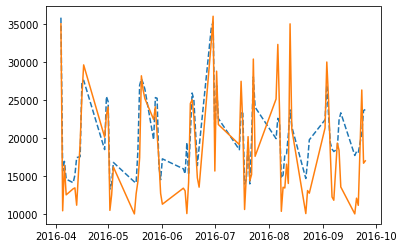

In [ ]:
plotModel(best_model2)

## Hyper parameter Tuning on XGBoost

In [ ]:
params={'n_estimators':[100,200,500],'max_depth':[2,5,10],'learning_rate':[0.01,0.1,0.5]}

model = XGBRegressor(objective="reg:squarederror")
grid_search=GridSearchCV(model,params,cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=XGBRegressor(objective='reg:squarederror'),
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [2, 5, 10],
                         'n_estimators': [100, 200, 500]})

In [ ]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 500}

In [ ]:
best_model3=grid_search.best_estimator_
predictions3 = best_model3.predict(X_test)
trainModel(best_model3)

(0.5599916761056847, 3842.3571686921296)

In [ ]:
mean_absolute_error(y_test.values, predictions3)

3842.3571686921296

## Feature Engineering / Feature Selection

1. Create new features from the ones that we have
2. Select relevant features based on some numerical/statistical decision. .e.g feature importance from Random Forest, SHAP

In [ ]:
for ii,col in enumerate(X_train.columns):
  print(col,best_model.feature_importances_[ii])

div_rank 0.011030861869432178
gb 0.025943379051279396
streak 0.021551368847332112
double_header 0.00015603025856146546
runs_pg 0.04979736119533113
runs_ma 0.02825526534486901
runs_allowed_ma 0.031067817261996332
ten_game 0.016622768915144037
opening_day 0.04145867063324229
total_games 0.05699116375812894
win_pct 0.09036668993431916
night_game 0.01083874043544164
year 0.24675160038398286
month 0.009813518098838056
day 0.03224473362427327
weekday 0.12434276491381965
division_game 0.0025822892159100704
opponent_ARI 0.0005840109704101888
opponent_ATL 8.034141172811325e-05
opponent_BAL 0.0012611163696895067
opponent_BOS 0.023752356833833765
opponent_CAL 0.0008057974827248383
opponent_CHC 0.0002491379292285162
opponent_CHW 0.0018017392555137709
opponent_CIN 5.428099186399616e-05
opponent_CLE 0.002512208679947684
opponent_COL 0.0001287777975421398
opponent_DET 0.0022025195225238953
opponent_FLA 0.000116959973301624
opponent_HOU 0.0004378892401770933
opponent_KCR 0.0026679777549730504
opponent

In [ ]:
important_features=X_train.columns[best_model.feature_importances_.argsort()[::-1]][:40]
important_features

Index(['year', 'weekday', 'win_pct', 'opponent_SFG', 'total_games', 'runs_pg',
       'opening_day', 'opponent_NYY', 'day', 'runs_allowed_ma', 'runs_ma',
       'gb', 'opponent_BOS', 'streak', 'ten_game', 'weekday_name_Wednesday',
       'div_rank', 'night_game', 'month', 'weekday_name_Thursday',
       'opponent_LAD', 'opponent_SEA', 'opponent_KCR', 'opponent_TEX',
       'division_game', 'opponent_CLE', 'opponent_DET', 'opponent_MIL',
       'opponent_TOR', 'opponent_CHW', 'opponent_TBD', 'opponent_MIN',
       'weekday_name_Monday', 'weekday_name_Saturday', 'weekday_name_Tuesday',
       'opponent_LAA', 'opponent_BAL', 'weekday_name_Sunday', 'opponent_CAL',
       'opponent_ARI'],
      dtype='object')

In [ ]:
X_train_red=X_train.loc[:,important_features]
X_test_red=X_test.loc[:,important_features]

In [ ]:
X_train.shape,X_train_red.shape

((2061, 55), (2061, 40))

In [ ]:
X_train.columns

Index(['div_rank', 'gb', 'streak', 'double_header', 'runs_pg', 'runs_ma',
       'runs_allowed_ma', 'ten_game', 'opening_day', 'total_games', 'win_pct',
       'night_game', 'year', 'month', 'day', 'weekday', 'division_game',
       'opponent_ARI', 'opponent_ATL', 'opponent_BAL', 'opponent_BOS',
       'opponent_CAL', 'opponent_CHC', 'opponent_CHW', 'opponent_CIN',
       'opponent_CLE', 'opponent_COL', 'opponent_DET', 'opponent_FLA',
       'opponent_HOU', 'opponent_KCR', 'opponent_LAA', 'opponent_LAD',
       'opponent_MIL', 'opponent_MIN', 'opponent_MON', 'opponent_NYM',
       'opponent_NYY', 'opponent_PHI', 'opponent_PIT', 'opponent_SDP',
       'opponent_SEA', 'opponent_SFG', 'opponent_STL', 'opponent_TBD',
       'opponent_TBR', 'opponent_TEX', 'opponent_TOR', 'opponent_WSN',
       'weekday_name_Monday', 'weekday_name_Saturday', 'weekday_name_Sunday',
       'weekday_name_Thursday', 'weekday_name_Tuesday',
       'weekday_name_Wednesday'],
      dtype='object')

In [ ]:
model4 = RandomForestRegressor()
model4.fit(X_train_red, y_train)

RandomForestRegressor()

In [ ]:
predictions4 = model4.predict(X_test_red)
mean_absolute_error(y_test.values, predictions4)

3538.427530864197

2627.3499999999985

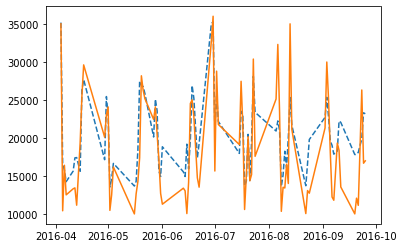

In [ ]:
plotModel(model4)